In [80]:
import numpy as np 
import matplotlib.pyplot as mtp  
import pandas as pd  
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
import statsmodels.api as sm   

In [81]:
df = pd.read_excel(r'D:\MBATech\badm\031020 mt2\badm_mt2.xlsx', sheet_name='Sheet1')

In [82]:
x= df.iloc[:, [0,2]].values  
y= df.iloc[:, 3].values  

In [83]:
model = LogisticRegression(solver='liblinear', C=100.0, random_state=0)
model.fit(x, y)

p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gmat             40 non-null     int64  
 1   gpa              40 non-null     float64
 2   work_experience  40 non-null     int64  
 3   admitted         40 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


In [85]:
print(score_)

0.925


In [86]:
print(conf_m)

[[19  2]
 [ 1 18]]


In [87]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.90      0.95      0.92        19

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40



In [88]:
confusion_matrix=confusion_matrix(y,y_pred)
print(confusion_matrix)

[[19  2]
 [ 1 18]]


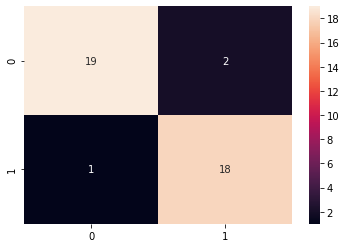

In [89]:
sn.heatmap(confusion_matrix, annot=True)

In [90]:
#x_train = sm.add_constant(x_train)
modl = sm.OLS(y_pred, x).fit()
modl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.801
Model:                            OLS   Adj. R-squared (uncentered):              0.790
Method:                 Least Squares   F-statistic:                              76.46
Date:                Sat, 03 Oct 2020   Prob (F-statistic):                    4.79e-14
Time:                        09:53:40   Log-Likelihood:                         -10.610
No. Observations:                  40   AIC:                                      25.22
Df Residuals:                      38   BIC:                                      28.60
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0003      0.000     -1.745      0.089      -0.001    5.17e-05
x2             0.2137      0.032      6.739      0.000       0.150       0.278
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.262
Skew:                          -0.168   Prob(JB):                        0.877
Kurtosis:                       2.789   Cond. No.                         407.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""